# Dados Abertos - Senado Brasileiro, CEAPS

Os presentes dados estão disponíveis publicamente no site do governo brasileiro como parte da politica de acesso a dados públicos de forma aberta afim de ter-se transparência nos gastos públicos.


[Senado.leg.br Site dos dados](https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps)

## Carregando módulos usados na análise.

Bibliotecas usadas para carregamentos dos dados, cálculos e renderização dos gráficos.

Incluem:

[Numpy](https://numpy.org/)

[Pandas](https://pandas.pydata.org/)

[Matplotlib](https://matplotlib.org/)

[Plotly - Visualização de dados](https://plotly.com/)

In [109]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import re
import csv
import glob
%matplotlib inline

pd.options.plotting.backend = "plotly"

## Carregamento dos Dados


### Sobre os Dados

Diversas inconsistências e dados faltantes em campos. Detalhes como datas e informação de documento faltando, ou data não preenchida ou preenchida de forma incompleta.



### Ano de 2022

Amostra para o ano de 2022

In [110]:
# header=1 -> ignore first line header
df = pd.read_csv('data/despesa_ceaps_2022.csv', delimiter=';', header=1, encoding='iso-8859-1')
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000,2173617


### Todos Anos 2008/2022

Carregando lista de arquivos contendo os dados para análise.

In [111]:
datas = {}
for file in sorted(glob.glob('data/*.csv')):
    
    if re.search(r'[0-9]+(.csv)', file):
        print('> load... ', file)
        datas[ re.search(r'[0-9]+', file ).group(0) ] = pd.read_csv(file, delimiter=';', header=1, encoding='iso-8859-1')
#(lambda d, x: [d.pop(i) for i in x] )(datas, ['2008','2009', '2010', '2011','2012'])

> load...  data/despesa_ceaps_2008.csv
> load...  data/despesa_ceaps_2009.csv
> load...  data/despesa_ceaps_2010.csv
> load...  data/despesa_ceaps_2011.csv
> load...  data/despesa_ceaps_2012.csv
> load...  data/despesa_ceaps_2013.csv
> load...  data/despesa_ceaps_2014.csv
> load...  data/despesa_ceaps_2015.csv
> load...  data/despesa_ceaps_2016.csv
> load...  data/despesa_ceaps_2017.csv
> load...  data/despesa_ceaps_2018.csv
> load...  data/despesa_ceaps_2019.csv
> load...  data/despesa_ceaps_2020.csv
> load...  data/despesa_ceaps_2021.csv
> load...  data/despesa_ceaps_2022.csv


### Pré-Processamento dos Dados

Concatenando as tabelas de dados para formar um único da dataframe com os dados para análise.

In [112]:
dff = pd.concat(datas, ignore_index=True)


In [113]:
dff.loc[0:dff.shape[0],'VALOR_REEMBOLSADO'].replace(r'(\s)', '', regex=True, inplace=True)
dff.loc[0:dff.shape[0],'VALOR_REEMBOLSADO'].replace(r'(\n)','', regex=True, inplace=True)
dff.loc[0:dff.shape[0], 'VALOR_REEMBOLSADO'].replace(r'(\r)', '', regex=True, inplace=True)
dff.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008091e+12
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"386,6",2.008091e+12
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008101e+12
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"2610,68",2.008101e+12
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008111e+12


In [114]:
dff.loc[0:,'VALOR_REEMBOLSADO'].replace( regex=r'(,)', value='.',  inplace=True )
#dff.loc[0:dff.shape[0],'VALOR_REEMBOLSADO'] =dff.loc[0:dff.shape[0],'VALOR_REEMBOLSADO'].replace( regex={r'(,)':'.'} )
#dfs['VALOR_REEMBOLSADO'] = pd.to_numeric(dff['VALOR_REEMBOLSADO'], downcast='float')
dff.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2.008091e+12
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,386.6,2.008091e+12
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2.008101e+12
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,2610.68,2.008101e+12
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2.008111e+12


In [115]:
dff[ 'VALOR_REEMBOLSADO'] = pd.to_numeric(dff['VALOR_REEMBOLSADO'], downcast='float')
#dff.dropna(inplace=True)
#dff.to_csv('data.csv', index=False)

## Tratamento e Limpeza dos Dados (Data Wrangling)

No campo 'VALOR_REEMBOLSADO' trocar virgula por ponto e converter para tipo numérico (float).

In [116]:
df['VALOR_REEMBOLSADO'] = pd.to_numeric( df['VALOR_REEMBOLSADO'].replace(regex=r'(,)', value='.'), downcast='float')



In [117]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.0,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.0,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.0,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.0,2173617


Converter campo 'DATA' do tipo string para tipo Date. Campos de data não preenchidos ou preenchidos em formato incorreto será ignorados mantendo conteúdo antigo sem ser convertido para o tipo _"datetime"_ do Python.

In [118]:
# Converter DATA para tipo Date
df['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True, errors='ignore')

### Tabela dos Dados Pré-processada e Tratada

In [119]:
df

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,2022-01-03,Despesa com pagamento de aluguel de imóvel par...,6000.00,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,2022-01-04,Despesa com divulgação da atividade parlamenta...,1500.00,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,2022-01-14,Despesa com produção de texto e edição de víde...,6000.00,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,2022-01-18,Divulgação da atividade parlamentar,1000.00,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,2022-01-17,Divulgação da atividade parlamentar,2000.00,2173617
...,...,...,...,...,...,...,...,...,...,...,...
16593,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,2022-12-06,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04,2191398
16594,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,2022-12-09,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19,2192272
16595,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,2022-12-20,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.90,2192274
16596,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,2022-12-21,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31,2192244


## Gastos Para o Ano de 2022

In [120]:
senadores = df['SENADOR'].unique()
df_gastos_sn = { 'Senador':[], 'GastoAnual':[], 'RegsSemDocumento':[], 'RegsSemDetalhamentoDoGasto':[] }

In [121]:
df.loc[ df['SENADOR'] == 'LUCAS BARRETO', 'DETALHAMENTO' ].isna().sum()

228

In [122]:
for i in senadores:
    df_gastos_sn['Senador'].append(i)
    df_gastos_sn['GastoAnual'].append( df.loc[ df['SENADOR'] == i, 'VALOR_REEMBOLSADO'].sum() )
    #df_gastos_sn['RegsSemDocumento'].append( df[ df.loc[0:,'DOCUMENTO'].isna() == True][df.loc[0:,'SENADOR'] == i ].isna().sum()['DOCUMENTO'] )
    df_gastos_sn['RegsSemDocumento'].append( df.loc[ df['SENADOR'] == i, 'DOCUMENTO'].isna().sum() )
    #df_gastos_sn['RegsSemDetalhamentoDoGasto'].append( df[ df.loc[0:,'DETALHAMENTO'].isna() == True][df.loc[0:, 'SENADOR'] == i ].isna().sum()['DETALHAMENTO'] )
    df_gastos_sn['RegsSemDetalhamentoDoGasto'].append( df.loc[ df['SENADOR'] == i, 'DETALHAMENTO'].isna().sum() )


In [123]:
print( len(df_gastos_sn['GastoAnual']), len(df_gastos_sn['Senador']), len(df_gastos_sn['RegsSemDocumento']), len(df_gastos_sn['RegsSemDetalhamentoDoGasto']))

97 97 97 97


In [124]:
#ds = pd.DataFrame( { 'Senador': df_gastos_sn['Senador'], 'Gastos': df_gastos_sn['GastoAnual'] })
ds = pd.DataFrame( df_gastos_sn )
ds = ds.sort_values(by=['GastoAnual'], ascending=False)
ds

,Senador,GastoAnual,RegsSemDocumento,RegsSemDetalhamentoDoGasto
50,LUCAS BARRETO,511319.78,0,228
90,TELMÁRIO MOTA,488693.40,0,249
64,MECIAS DE JESUS,488586.66,0,127
68,OMAR AZIZ,487541.24,0,0
9,CHICO RODRIGUES,486958.05,0,72
...,...,...,...,...
5,ANTONIO ANASTASIA,19647.13,3,15
33,GUARACY SILVEIRA,19285.82,0,1
49,LEILA BARROS,10567.64,12,12
63,MARIA ELIZA DE AGUIAR E SILVA,10136.42,0,0


### 10 Senadores com Maior Gastos 2022

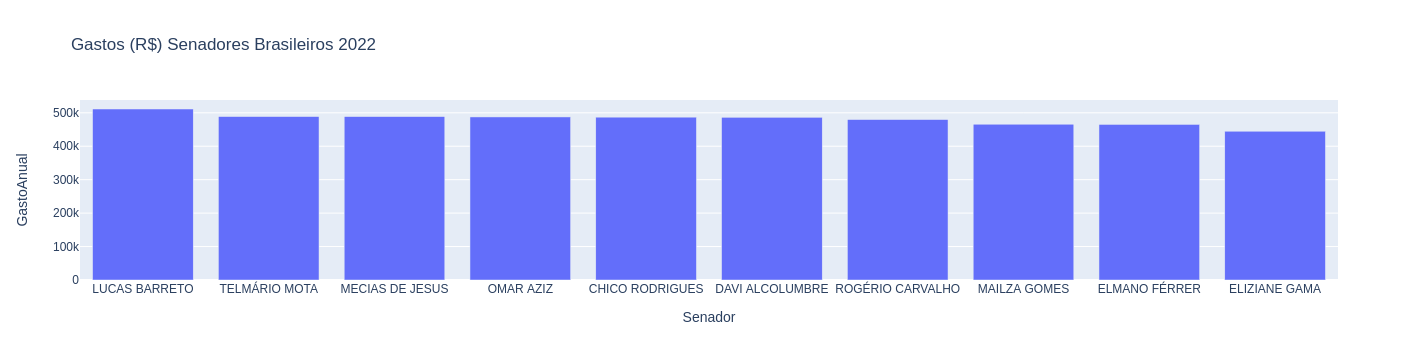

In [125]:
ds[:10].plot(x='Senador', y='GastoAnual', title='Gastos (R$) Senadores Brasileiros 2022', kind='bar')

### 10 Senadores com mais ocorrência de falta de Documento comprobatório do gasto na Base de Dados

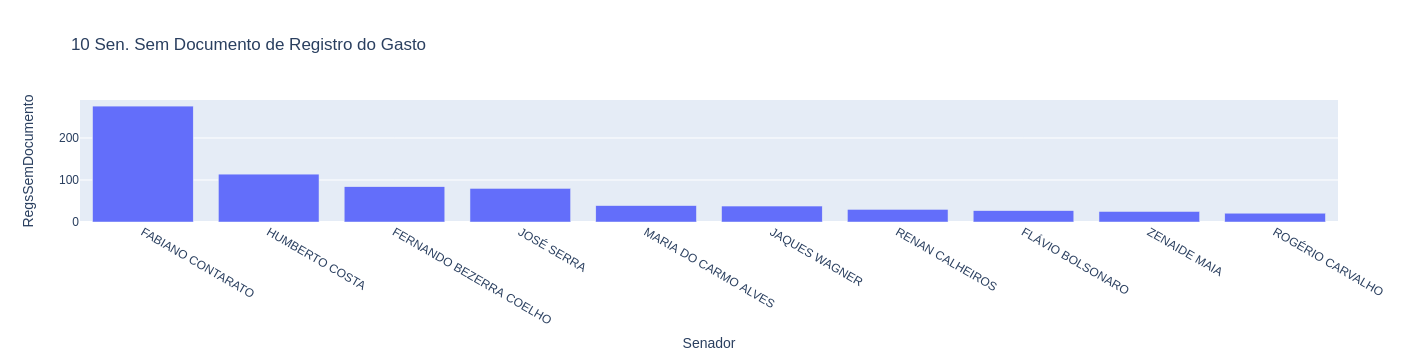

In [126]:
ds.sort_values(by=['RegsSemDocumento'], ascending=False)[:10].plot(x='Senador', y='RegsSemDocumento', title='10 Sen. Sem Documento de Registro do Gasto', kind='bar')

In [127]:
# Número de campos não preenchidos para senadora 'Zenaide Maia'. Neste trecho é possível contar quantos senadores não
# preencheram o campo para o documento do gasto declarado.
#df[ df['DOCUMENTO'].isna() == True][df['SENADOR'] == 'ZENAIDE MAIA'].isna().sum()

In [128]:
# Plotly geneate fle to graphics host
#import plotly.io as pio
#fig_a = ds[:10].plot(x='Senador', y='GastoAnual', title='Gastos (R$) Senadores Brasileiros 2022', kind='bar')
#fig_b = ds.sort_values(by=['RegsSemDocumento'], ascending=False)[:10].plot(x='Senador', y='RegsSemDocumento', title='10 Sen. Sem Documento de Registro do Gasto', kind='bar')
#pio.write_html(fig_a, file='figa.html', auto_open=True)
#pio.write_html(fig_b, file='figb.html', auto_open=True)

In [129]:
dff[dff["ANO"] == 2008 ]["VALOR_REEMBOLSADO"].sum()

11575947.4

### Total gastos Por Mês

In [130]:
anos = [ i for i in range(2008, 2023) ]
mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jul', 'Jun', 'Agos', 'Set', 'Nov', 'Dez']


In [131]:
data = {'Data': [], 'Gasto': []}
for i in anos:
    for j in mes:
        data['Data'].append(j+'/'+str(i))
        data['Gasto'].append( dff[ (dff['ANO'] == i ) & ( dff['MES']  == mes.index(j) + 1 ) ]['VALOR_REEMBOLSADO'].sum() )

In [132]:
dl = pd.DataFrame(data, columns=['Data', 'Gasto'])

In [133]:
dl.to_csv('sgasto.csv', index=False)

In [134]:
#dl.drop([0], inplace=True)
A = np.array([dl.index, dl['Gasto'] ] )
A[0][1]

1.0

In [135]:
asize = int( (75/100.0)*dl.shape[0] ) + 1
tsize = dl.shape[0] - asize

ds_train = dl[0:asize].copy()
ds_test = dl[asize:].copy() 



In [136]:
ds_train.head()

,Data,Gasto
0,Jan/2008,0.00
1,Fev/2008,900507.98
2,Mar/2008,1064673.39
3,Abr/2008,1032569.59
4,Mai/2008,918064.51


In [137]:

#ds_test = ds_test.reindex([ i+1 for i in range(tsize) ], method='bfill', copy=True)
ds_test.head()

,Data,Gasto
124,Abr/2019,2036964.21
125,Mai/2019,2197949.53
126,Jul/2019,2199537.09
127,Jun/2019,1880208.80
128,Agos/2019,2185251.87


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [139]:
dl = dl.drop([0])

In [140]:
np.array(dl.index)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164])

In [141]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dl.index).reshape(-1,1), np.array(dl['Gasto']).reshape(-1,1), test_size = 0.30)

regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(f'Score:  {round(regr.score(X_test, y_test)*100, 3)}%')

Score:  24.952%


In [142]:
print(X_test.shape, y_test.shape)

(50, 1) (50, 1)


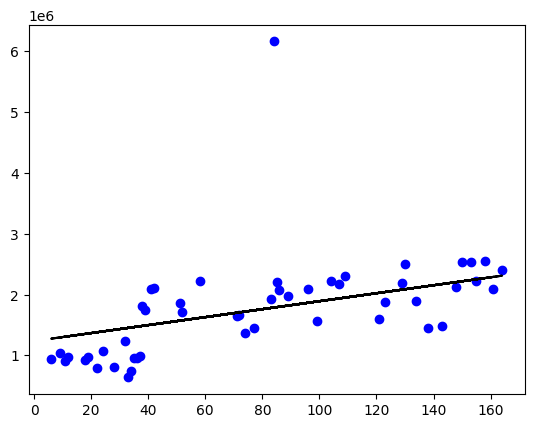

In [143]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

## Gastos Mensais (Total) Senado

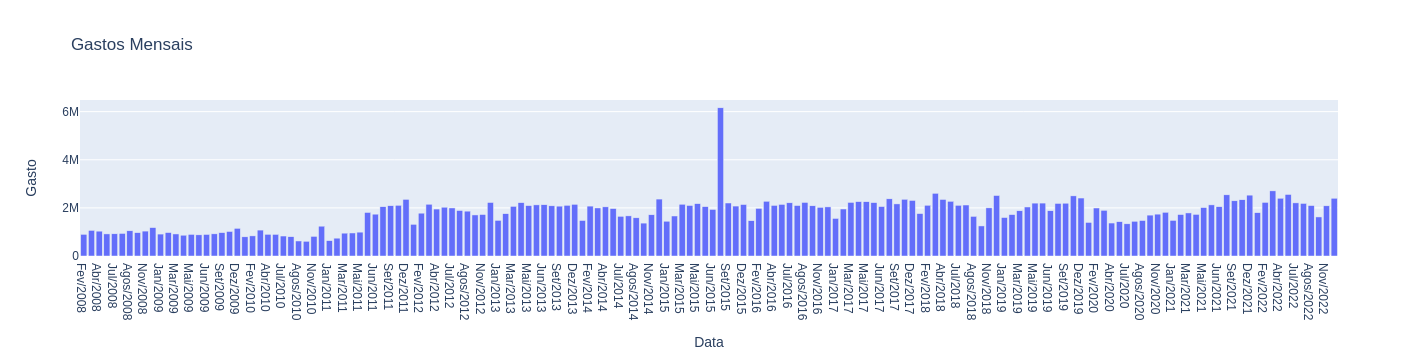

In [144]:
dl.plot(x='Data', y='Gasto', title='Gastos Mensais', kind='bar')

In [145]:
dff[ ( dff['MES']  == mes.index('Fev')+1 ) & (dff['ANO'] == 2008) ]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
8,2008,2,ADELMIR SANTANA,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,13800.00,2.008021e+12
9,2008,2,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,1151.13,2.008021e+12
30,2008,2,ALMEIDA LIMA,"Aluguel de imóveis para escritório político, c...",NaN,NaN,NaN,NaN,NaN,2279.98,2.008020e+12
31,2008,2,ALMEIDA LIMA,Aquisição de material de consumo para uso no e...,NaN,NaN,NaN,NaN,NaN,140.90,2.008020e+12
32,2008,2,ALMEIDA LIMA,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,41.22,2.008020e+12
...,...,...,...,...,...,...,...,...,...,...,...
2352,2008,2,VALTER PEREIRA,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,10403.56,2.008021e+12
2406,2008,2,WELLINGTON SALGADO DE OLIVEIRA,"Aluguel de imóveis para escritório político, c...",NaN,NaN,NaN,NaN,NaN,1796.21,2.008021e+12
2407,2008,2,WELLINGTON SALGADO DE OLIVEIRA,Aquisição de material de consumo para uso no e...,NaN,NaN,NaN,NaN,NaN,247.59,2.008021e+12
2408,2008,2,WELLINGTON SALGADO DE OLIVEIRA,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,450.00,2.008021e+12


In [146]:
dff[ (dff['MES'] == 8) & (dff['ANO'] == 2015) ]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
144393,2015,8,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,008/15,03/08/2015,Despesa com pagamento de aluguel de imóvel par...,6000.00,2015568.0
144394,2015,8,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000539271,06/08/2015,Despesa com aquisição de combustível para abas...,1960.11,2015569.0
144395,2015,8,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000539459,07/08/2015,Despesa com aquisição de combustível para abas...,1538.08,2015570.0
144396,2015,8,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000539877,10/08/2015,Despesa com aquisição de combustível para abas...,1960.11,2015571.0
144397,2015,8,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0112-10,PETROBRAS DISTRIBUIDORA,000067584,12/08/2015,Despesa com aquisição de combustível para abas...,4575.22,2015573.0
...,...,...,...,...,...,...,...,...,...,...,...
170225,2015,8,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",02.575.829/0001-48,Avianca,Z8WCDT,28/08/2015,"Companhia Aérea: AVIANCA, Localizador: Z8WCDT....",1638.87,2018391.0
170226,2015,8,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,Azul,F65KMV,06/08/2015,"Companhia Aérea: AZUL, Localizador: F65KMV. Pa...",724.93,2018369.0
170227,2015,8,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,Azul,WE9I5N,10/08/2015,"Companhia Aérea: AZUL, Localizador: WE9I5N. Pa...",676.35,2018371.0
170228,2015,8,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,Azul,YDIFND,28/08/2015,"Companhia Aérea: AZUL, Localizador: YDIFND. Pa...",674.73,2018389.0
